In [1]:
import os
fuentes = '/System/Library/Fonts/Supplemental/'
set(os.listdir(fuentes))

{'Al Nile.ttc',
 'Al Tarikh.ttc',
 'AlBayan.ttc',
 'AmericanTypewriter.ttc',
 'Andale Mono.ttf',
 'Apple Chancery.ttf',
 'AppleGothic.ttf',
 'AppleMyungjo.ttf',
 'Arial Black.ttf',
 'Arial Bold Italic.ttf',
 'Arial Bold.ttf',
 'Arial Italic.ttf',
 'Arial Narrow Bold Italic.ttf',
 'Arial Narrow Bold.ttf',
 'Arial Narrow Italic.ttf',
 'Arial Narrow.ttf',
 'Arial Rounded Bold.ttf',
 'Arial Unicode.ttf',
 'Arial.ttf',
 'Athelas.ttc',
 'Ayuthaya.ttf',
 'Baghdad.ttc',
 'Bangla MN.ttc',
 'Bangla Sangam MN.ttc',
 'Baskerville.ttc',
 'Beirut.ttc',
 'BigCaslon.ttf',
 'Bodoni 72 OS.ttc',
 'Bodoni 72 Smallcaps Book.ttf',
 'Bodoni 72.ttc',
 'Bodoni Ornaments.ttf',
 'Bradley Hand Bold.ttf',
 'Brush Script.ttf',
 'Chalkboard.ttc',
 'ChalkboardSE.ttc',
 'Chalkduster.ttf',
 'Charter.ttc',
 'Cochin.ttc',
 'Comic Sans MS Bold.ttf',
 'Comic Sans MS.ttf',
 'Copperplate.ttc',
 'Corsiva.ttc',
 'Courier New Bold Italic.ttf',
 'Courier New Bold.ttf',
 'Courier New Italic.ttf',
 'Courier New.ttf',
 'DIN Alterna

# Funciones

In [2]:
from PIL import Image
from wordcloud import WordCloud

def get_wordcloud(text, image_dir, image_name, font_dir,
                  font = 'Arial Black.ttf',
                  n_title = 20,
                  repeat = False):
    #Sub-función para desplegar la imagen
    def plot_data(data):
      plt.imshow(data, interpolation='nearest')
      plt.show()
        
    ##IMPORTAR    
    orig = Image.open(image_dir + image_name)
    plot_data(np.array(orig))
    
    #AJUSTAR
    img = Image.new('RGB', orig.size, (255,255,255))
    try:
        img.paste(orig,orig) #ajusta la parte transparente pa que no se interprete como negro
    except:
        mask = np.array(orig)
    else:
        img.paste(orig,orig)
        mask = np.array(img) #convierte la imagen a datos (# de color)
    wordcloud = WordCloud(mask = mask, #lienzo para las palabras
                          font_path = font_dir + font, #dirección de fuente (tipo de letra)
                          color_func = lambda *args, **kwargs: 'white', #letras blancas
                          include_numbers = True,
                          prefer_horizontal = 0.83, #porcentaje de palabras horizontales
                          background_color = 'black', 
                          max_words = 10000,
                          max_font_size = 73,
                          repeat = repeat) #se repiten las palabras?
    wordcloud.generate(text+(' '+image_name[:-4].replace('_','-')+' ')*n_title
                      ).to_file(image_dir +f'WP_{image_name[:-4]}.png') #guarda como png
    wordcloud = Image.open(image_dir +f'WP_{image_name[:-4]}.png').convert('RGBA')
    datas = wordcloud.getdata() 
    #para obtener nuevamente la info en datos (RGBA contempla transparencia en el último elem)
    wordcloud.putdata([(255,255,255,0) if x[0]==x[1]==x[2]!=255 else x for x in datas]) 
    #si el color no es blanco (letras) vuelve transparente al pixelo
    wordcloud.paste(orig, box = (0,0), mask = wordcloud) #se sobrepone contra la orignal
    wordcloud.save(image_dir +f'WP_{image_name[:-4]}.png') #guarda la nueva imagen como png
    display(wordcloud)

In [22]:
def outlier(df, x , p = 0.2):
    var = df[x]
    q1 = var.quantile(p/2)
    q3 = var.quantile(1 - p/2)
    iqr = q3 - q1
    df = df[(var.isnull()) | ((var >= q1 - 1.5*iqr) & (var <= q3 + 1.5*iqr))].copy()
    return df

# Texto

In [3]:
# %load basic
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',200)
pd.options.display.float_format = '{:.2f}'.format
liga = '/Users/efraflores/Desktop/EF/diplo/AZ/data/'
os.listdir(liga)

['sentim.csv', 'df.csv']

In [4]:
df = pd.read_csv(liga + 'df.csv').join(pd.read_csv(liga + 'sentim.csv'))
df.sample(4)

/Users/efraflores/Desktop/corner/corner/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,category,Anio,Mes,Sem,DiaSem,reviewText_limpio,reviewText_long,reviewText_n_words,reviewText_relevant,neg,neu,pos,compound
448403,5.00,True,2015-05-16,A4JH8I88GNMOP,5554452574,JANDD,Billy Bob Thornton provided an excellent portr...,Excellent Acting in the Movie,0 days,NaN,No_especifica,NaN,movies_and_tv,2015,may,20,sab,billy bob thornton provided excellent portraya...,506.00,87.00,0.64,0.20,0.53,0.27,0.54
156163,5.00,True,2016-03-29,A106CSPIFDQFLV,B00149ND28,Michael Frost,Fantastic! Five Stars,Five Stars,0 days,NaN,No_especifica,NaN,video_games,2016,mar,13,mar,fantastic five star,21.00,3.00,0.91,0.00,0.36,0.64,0.56
664069,3.00,True,2014-01-06,A1Q11LLRVH4GAC,B00871Q5PI,D Gonzalez,"This product works as intended, and ive tested...",It does what its supposed to do...,0 days,NaN,No_especifica,NaN,cell_phones_and_accessories,2014,ene,2,lun,product work intended ive tested two phone rea...,275.00,52.00,0.55,0.00,0.91,0.09,0.34
1743,5.00,True,2013-11-29,A2LVF3YF71X265,B00000I1BG,Kevin,I have been searching for this game far and wi...,Tenchu,0 days,NaN,Sí,NaN,video_games,2013,nov,48,vie,searching game far wide finally acquired prett...,174.00,36.00,0.57,0.06,0.60,0.34,0.79


In [5]:
comen = df[['category','reviewText_limpio','overall','neg','neu','pos','compound']].copy()
comen.sample(4)

,category,reviewText_limpio,overall,neg,neu,pos,compound
348784,kindle_store,book fabulous absolutely loved everything cher...,5.00,0.16,0.58,0.26,0.90
367854,movies_and_tv,liked movie really good cast good plot little ...,4.00,0.26,0.46,0.27,0.20
561610,cell_phones_and_accessories,great value item definitely must car usb plug ...,5.00,0.07,0.57,0.36,0.95
480313,movies_and_tv,long print undeservedly bus stop return video ...,4.00,0.15,0.60,0.24,0.89


neg con calificación: 1.0


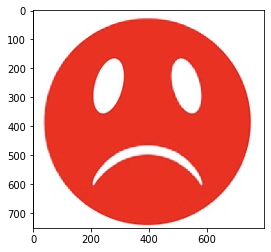

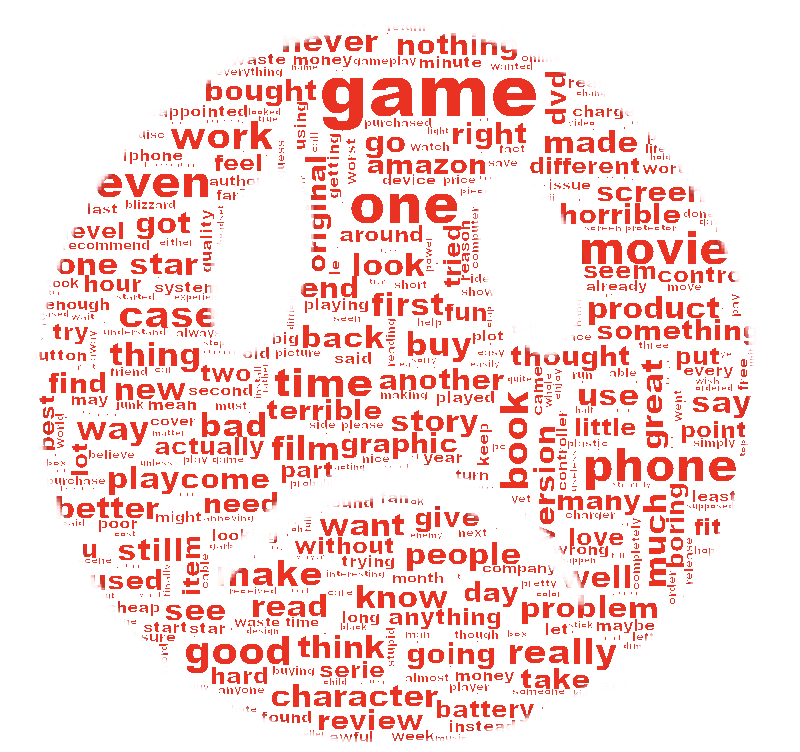

neu con calificación: 1.0


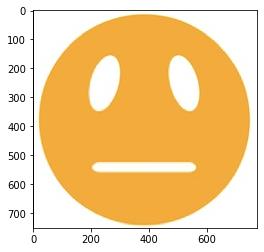

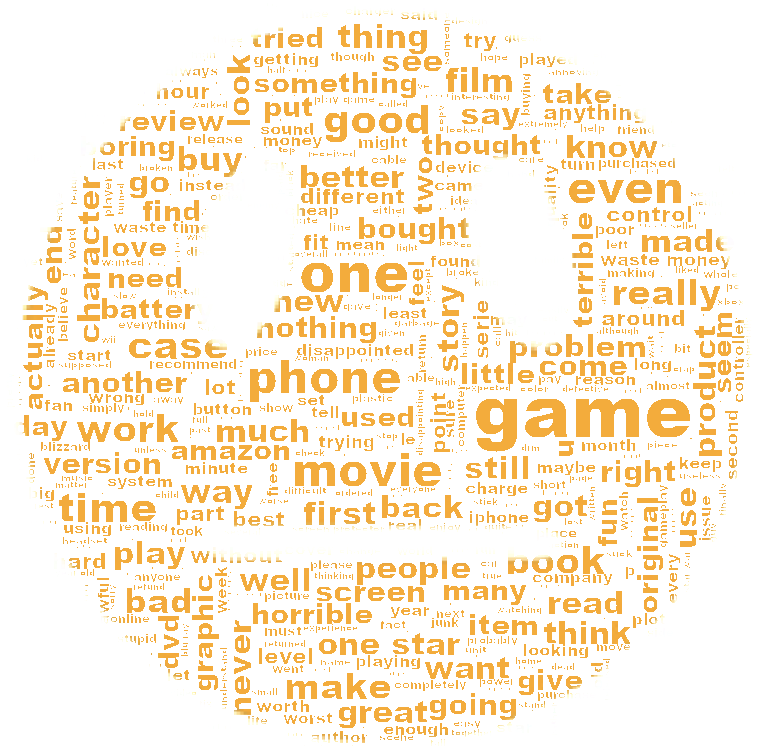

pos con calificación: 1.0


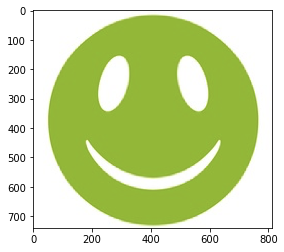

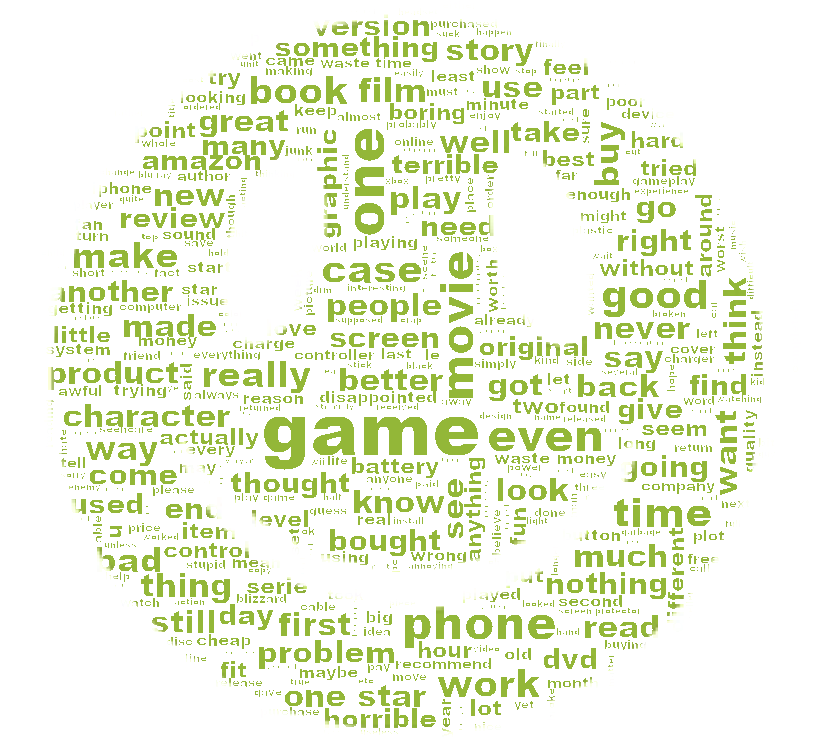

neg con calificación: 2.0


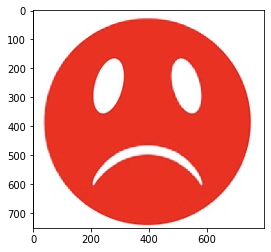

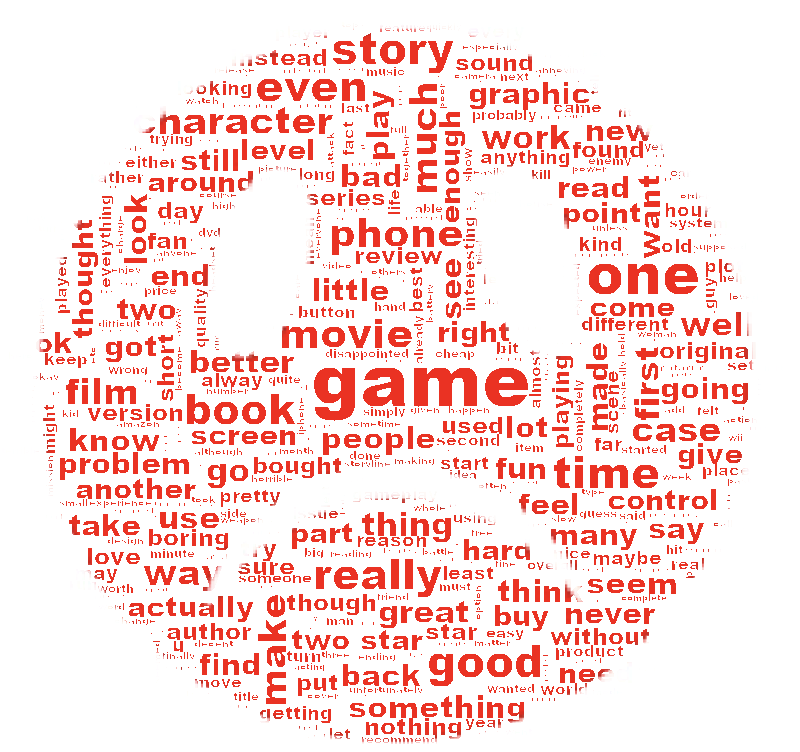

neu con calificación: 2.0


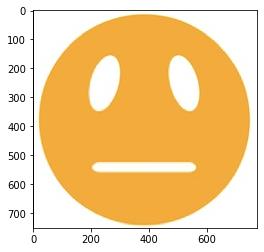

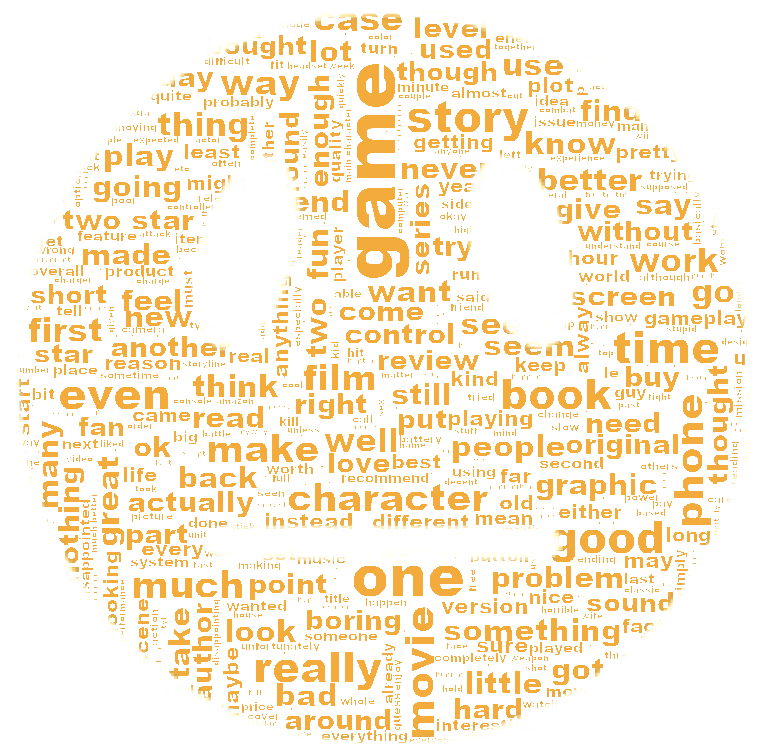

pos con calificación: 2.0


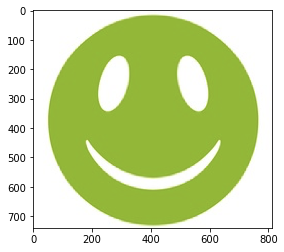

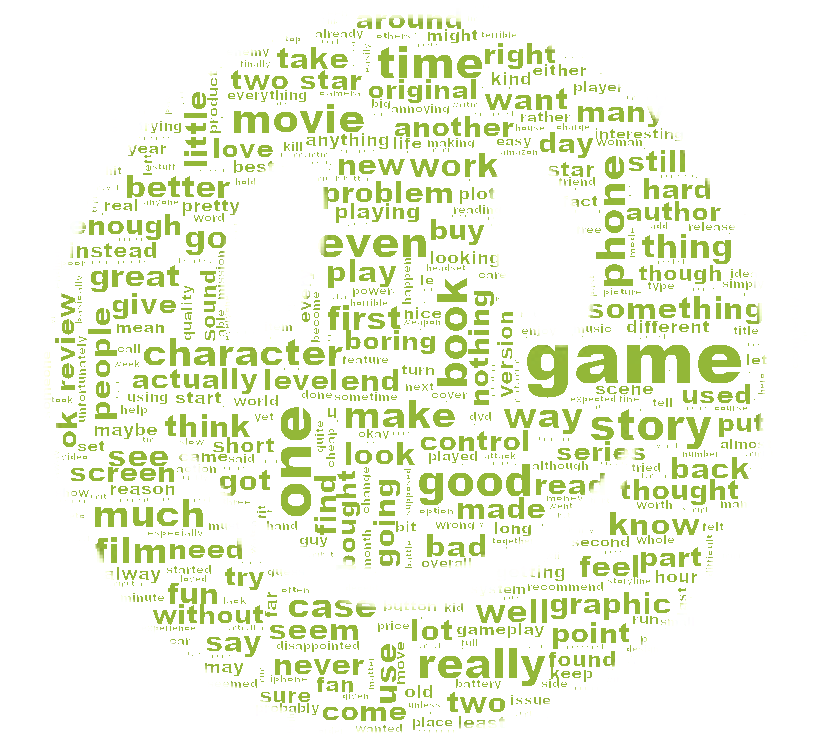

neg con calificación: 3.0


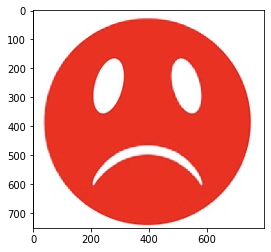

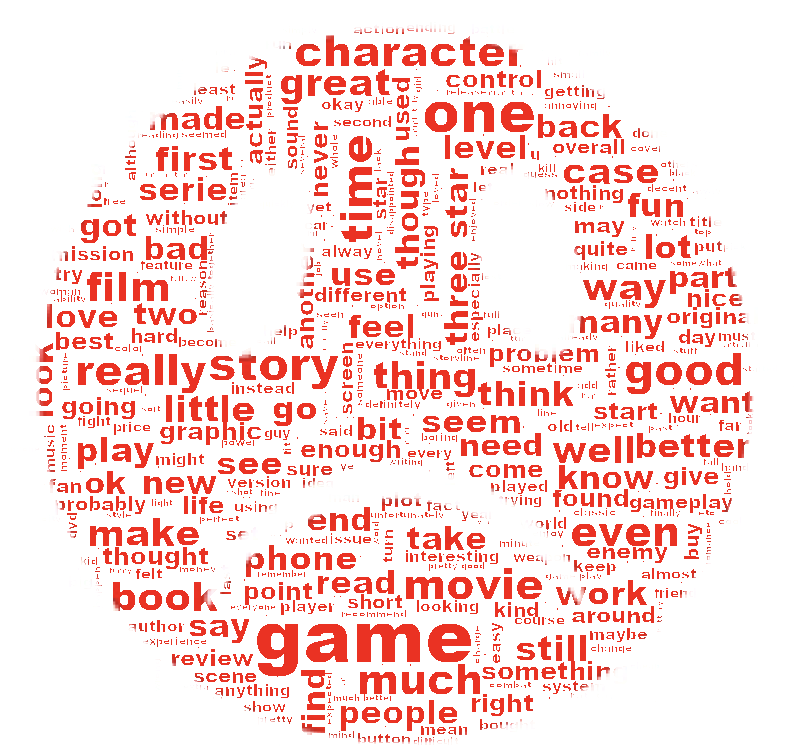

neu con calificación: 3.0


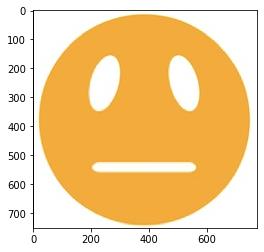

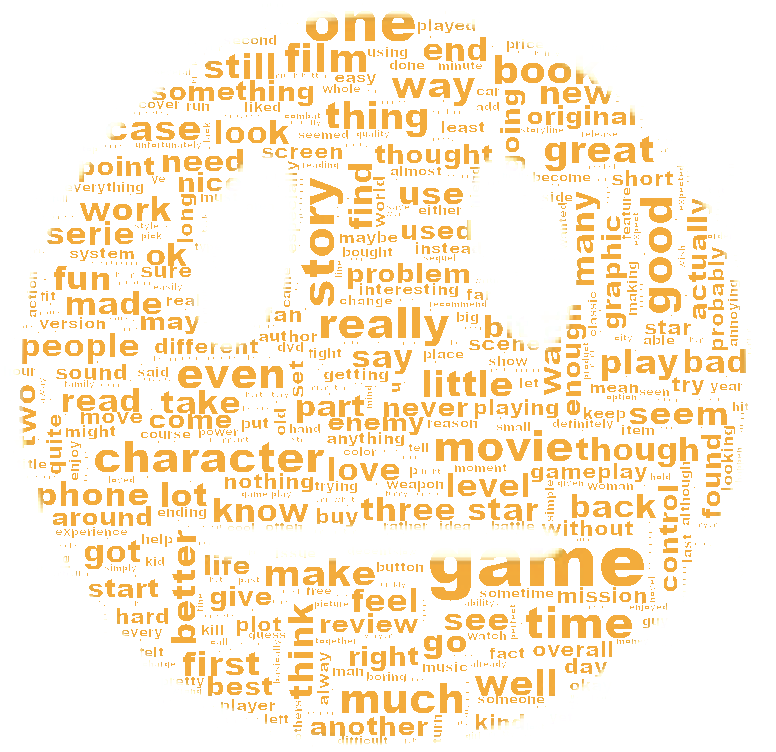

pos con calificación: 3.0


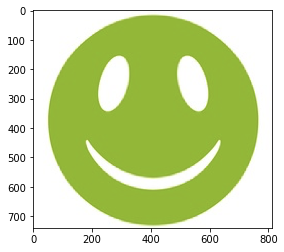

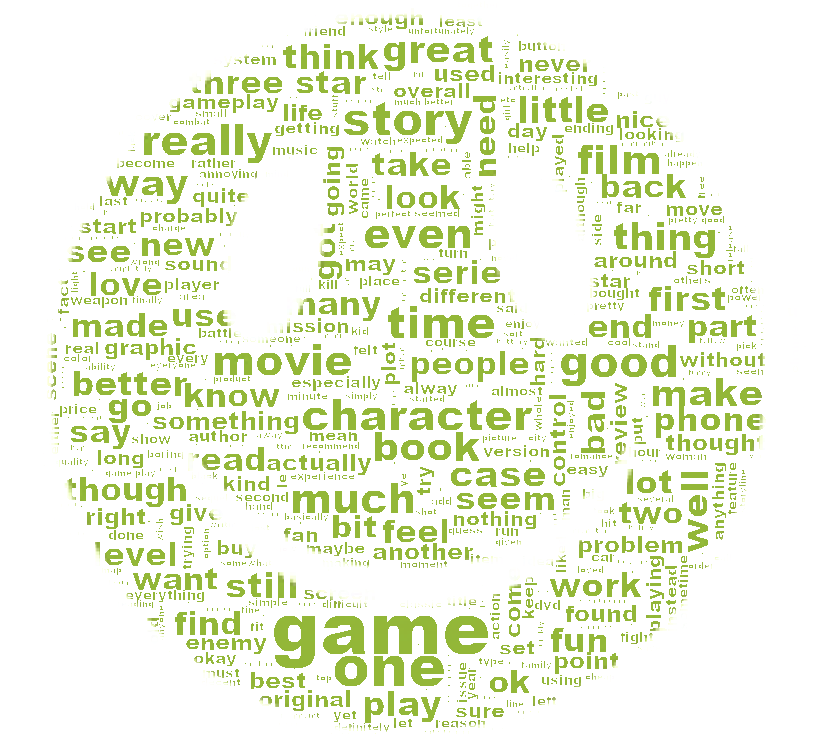

neg con calificación: 4.0


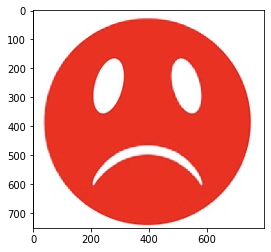

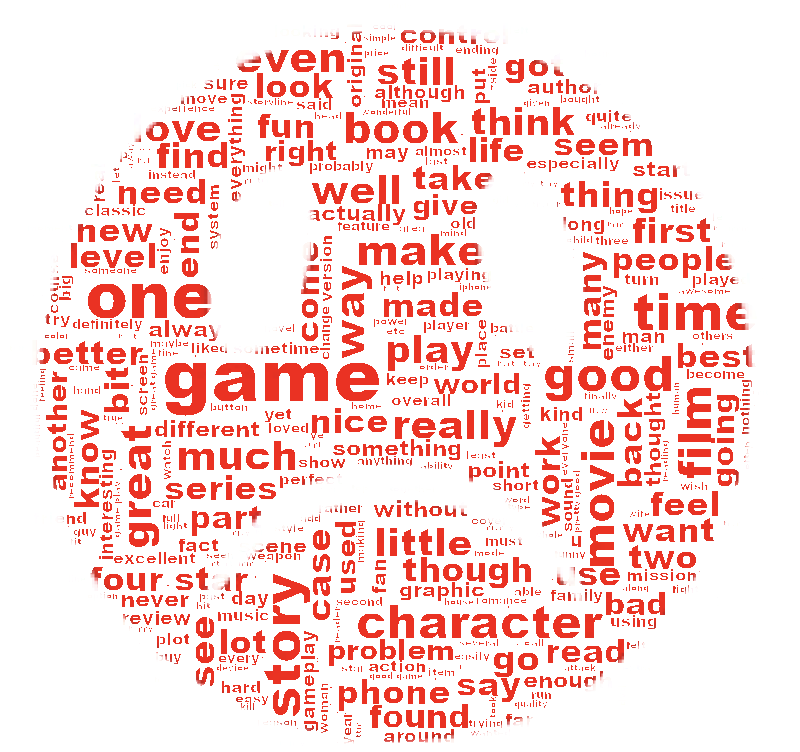

neu con calificación: 4.0


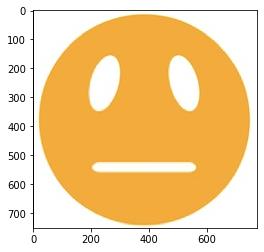

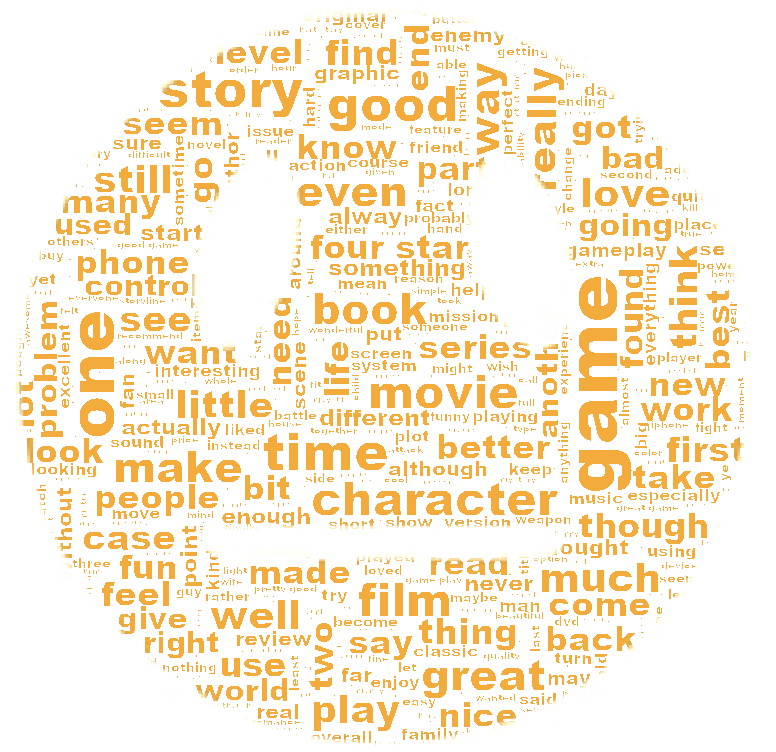

pos con calificación: 4.0


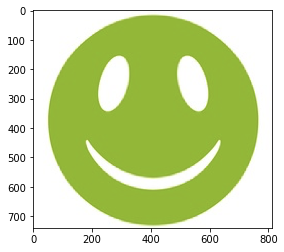

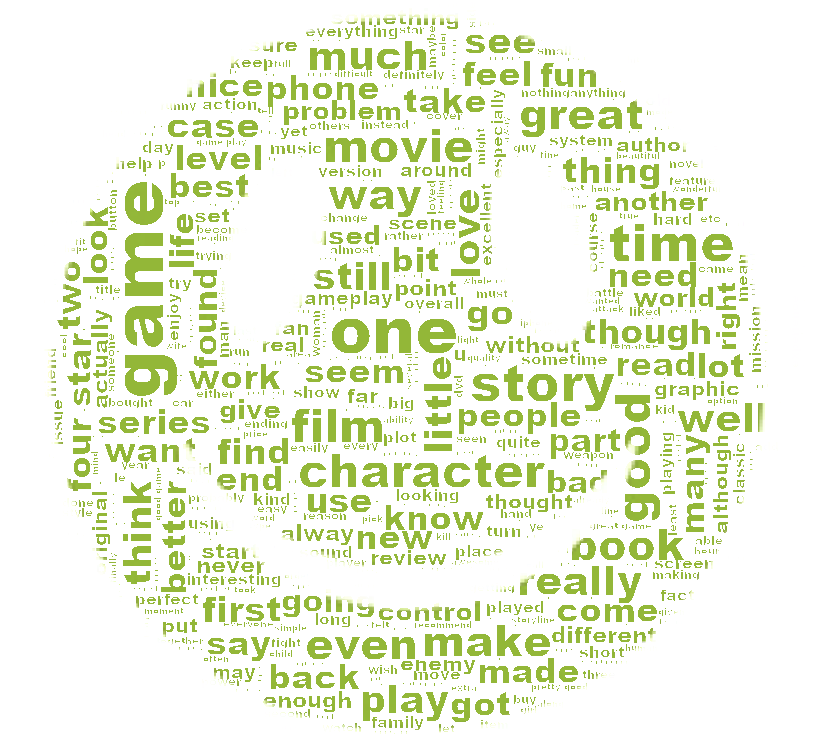

neg con calificación: 5.0


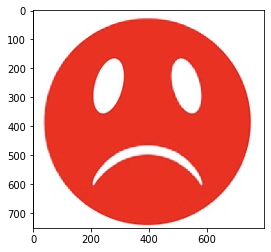

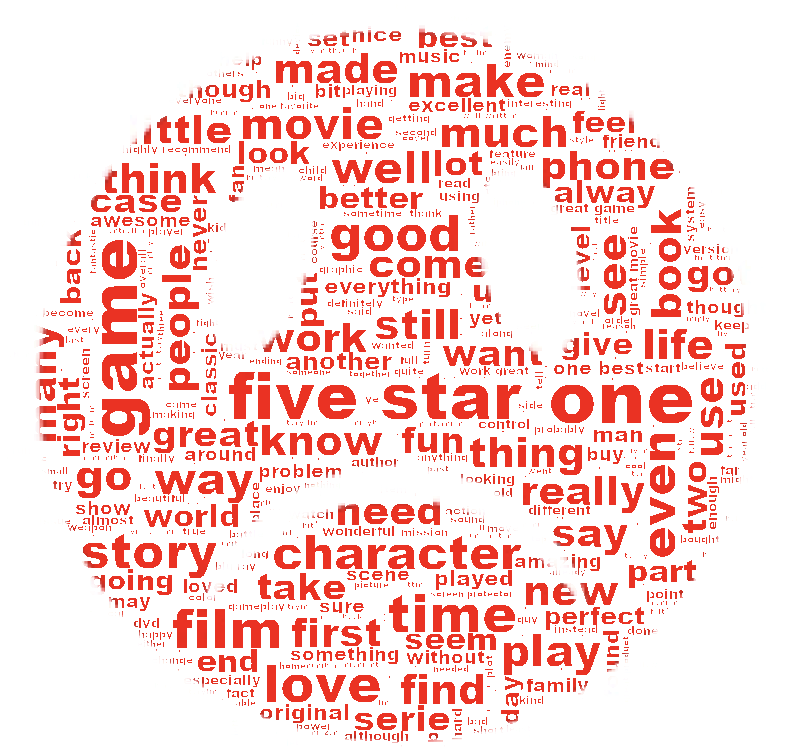

neu con calificación: 5.0


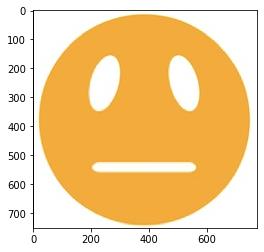

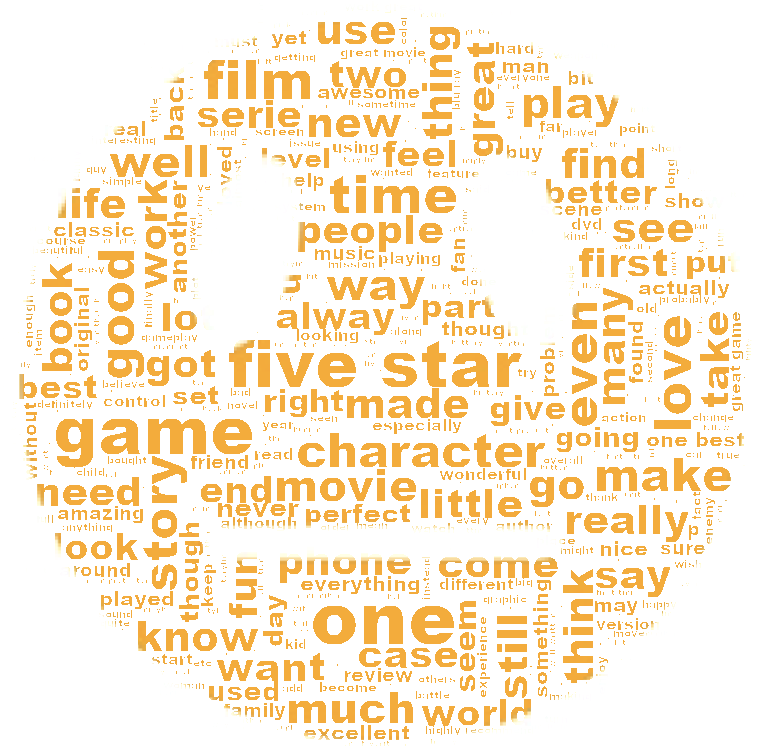

pos con calificación: 5.0


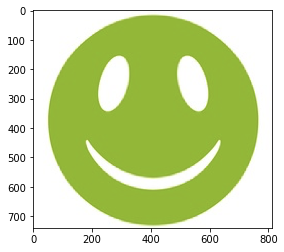

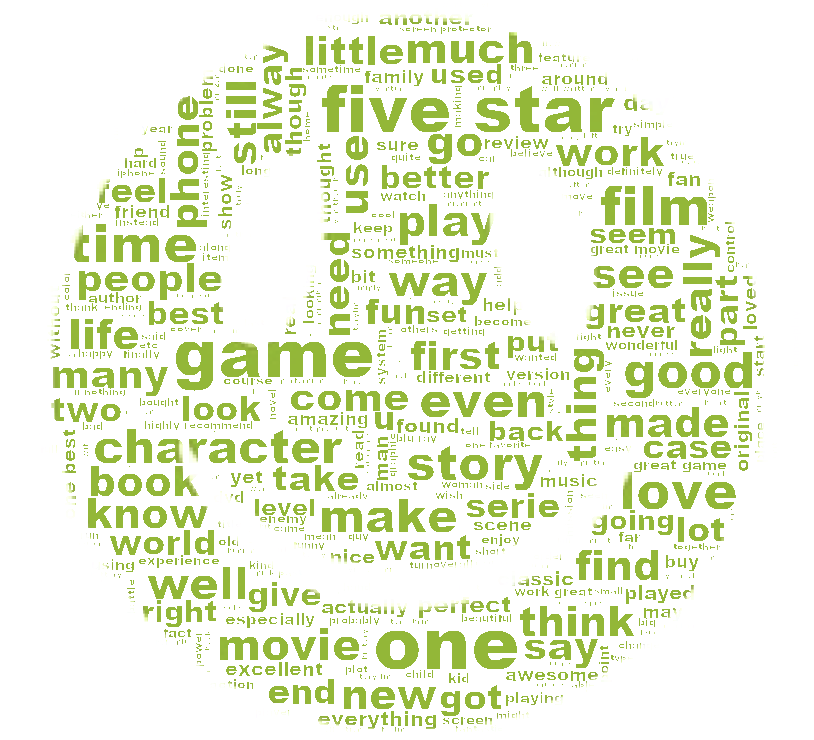

In [6]:
image_dir = liga[:-5] + 'images/'

for score in set(comen['overall']):
    aux = comen[comen['overall'] == score].copy().sample(frac = .1)
    for sent in ['neg','neu','pos']:
        tot_comen = ' '.join(aux['reviewText_limpio'].astype(str))
        print(f'{sent} con calificación: {score}')
        get_wordcloud(text = tot_comen, 
                      image_dir = image_dir, 
                      image_name = sent + '.png', 
                      font_dir = fuentes)

# Pairplot

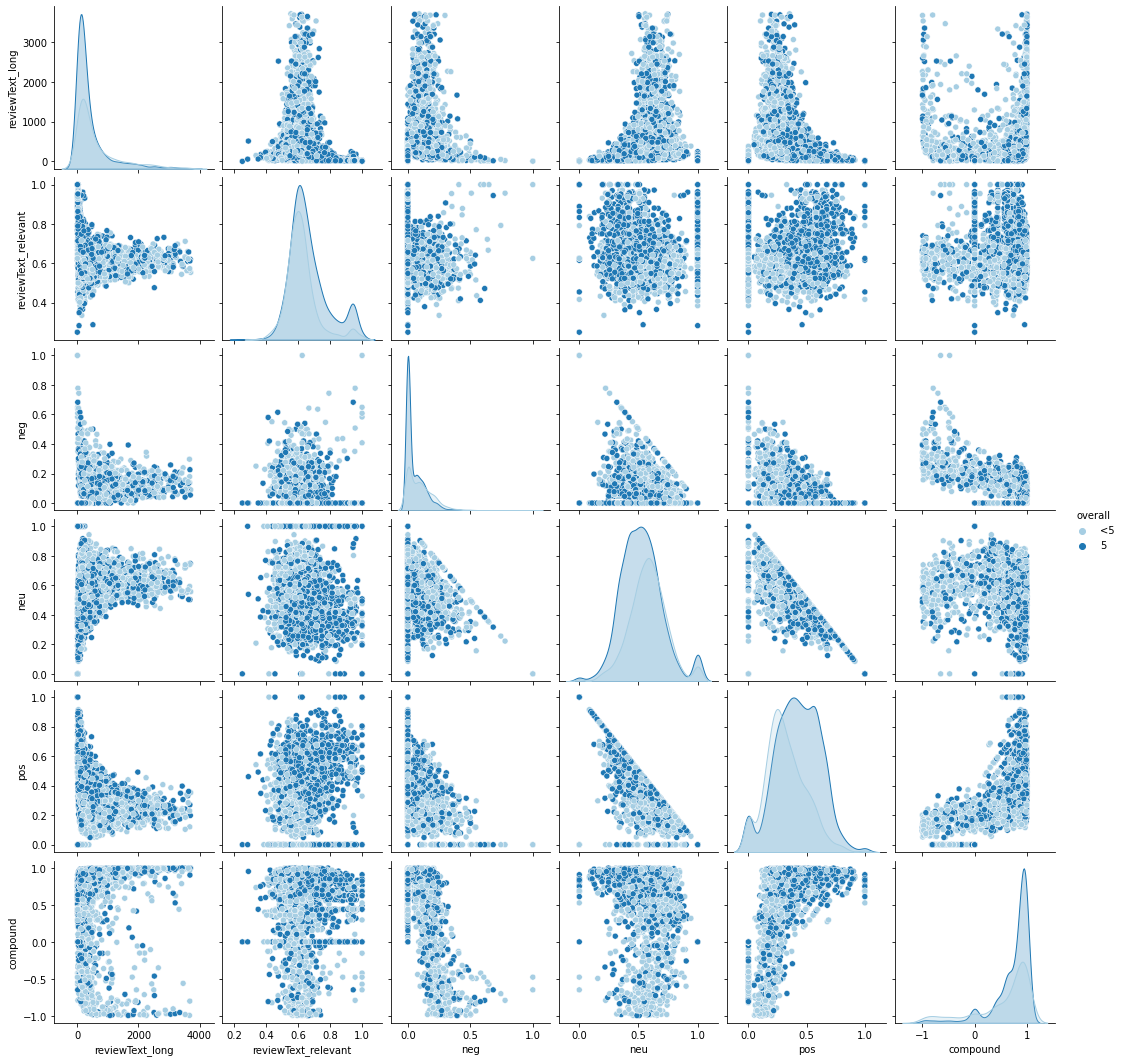

In [30]:
import seaborn as sns
grupo = ['overall', 'reviewText_long','reviewText_relevant',
         'neg', 'neu', 'pos', 'compound']

aux = df[grupo].copy()
aux['overall'] = ["<5" if x<5 else "5" for x in aux['overall']]
aux = outlier(aux,'reviewText_long')

sns.pairplot(aux.sample(frac = .005), hue = 'overall', palette = 'Paired')